<a href="https://colab.research.google.com/github/Sanyukta10-09/Sanyukta-Kharug/blob/main/Sanyukta_Kharug_starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Sanyukta Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [ ]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
# !pip install fetch-my-weather
!pip install hands-on-ai
# Install pyinputplus
!pip install pyinputplus
import os
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip

# ✅ Import after installing (if needed)
# from fetch_my_weather import get_weather
# from hands_on_ai import prompt_logger



  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyinputplus: filename=pyinputplus-0.2.12-py3-none-any.whl size=11349 sha256=7c5f5e9684c00ae93cd8efef5ea6f0629a8f3986a5fea9b5cb473ea19f29d959
  Stored in directory: /root/.cache/pip/wheels/a3/6b/89/3bec14288af8e0729d088fb41a785e583d49e772f2529c7676
  Created wheel for pysimplevalidate: filename=pysimplevalidate-0.2.12-py3-none-any.whl size=16224 sha256=890034b3f88b92e9c06bab97a7dfce559a407e991b9215e80e556ac639817d1f
  Stored in directory: /root/.cache/pip/wheels/fc/40/7a/4d3b2dc2e80b4b3bbda89eec94fcefd6c8bd1101cc7bb89554
  Created wheel for stdiomask: filename=stdiomask

## 📦 Setup and Configuration
Import required packages and setup environment.

In [ ]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
os.environ["OPENAI_API_KEY"] = input("Enter your OpenAI API key: ")

# Add any other setup code here

Enter your OpenAI API key: fd894de4b47cdcb1b720eb0b61ee306a


## 🌤️ Weather Data Functions

In [3]:
# Ensure all necessary packages are imported at the beginning of your notebook
# (Assuming the setup and imports cell has already been run)
!pip install pyinputplus
import os # Needed for os.environ
import requests # Needed for making API calls
import matplotlib.pyplot as plt # Included as per original notebook structure, though not used here
import pyinputplus as pyip # Needed for prompting for API key
import datetime # Needed for working with timestamps
os.environ["OPENAI_API_KEY"] = input("Enter your OpenAI API key: ")
# Define get_weather_data() function here
# MODIFIED: Added 'location' parameter
def get_weather_data(location, forecast_days=5):
    """
    Retrieves forecast weather data for a specified location using OpenWeatherMap API.

    Parameters:
        location (str): The name of the city or location (e.g., "Moka").
        forecast_days (int): Number of forecast days to retrieve.
                             NOTE: OpenWeatherMap free tier /data/2.5/forecast
                             endpoint provides a maximum of 5 days of forecast data
                             in 3-hour intervals. Requesting > 5 will still return max 5.
                             For true daily forecast up to 16 days, check the /forecast/daily
                             endpoint and your OpenWeatherMap plan.

    Returns:
        dict: {
            'current': {'summary': str}, # Note: This is derived from the first forecast entry
            'forecast': [
                {
                    'date': str,
                    'high': float, # Note: high/low are from the 3-hour interval entry, not daily max/min
                    'low': float,
                    'precipChance': int,
                    'summary': str
                },
                ...
            ]
        }
        or a dict with an 'error' key if something went wrong.
    """
    try:
        # 🔐 Get API key from environment or prompt
        api_key = os.environ.get("OPENWEATHER_API_KEY")
        if not api_key:
            # Prompt the user if the environment variable is not set
             print("OpenWeatherMap API key not found in environment variable OPENWEATHER_API_KEY.")
             api_key = pyip.inputStr("Enter your OpenWeatherMap API key: ")
             os.environ['OPENWEATHER_API_KEY'] = api_key # Optionally set it for future calls in this session

        # Basic validation for API key format (optional but good practice)
        if not isinstance(api_key, str) or len(api_key) == 0:
             raise ValueError("Invalid or empty API key provided.")

        # 🌐 Prepare API request - Using the 5-day / 3-hour forecast endpoint
        base_url = "https://api.openweathermap.org/data/2.5/forecast" # Using the 5-day / 3-hour endpoint
        # Note: The 'cnt' parameter is not used with this endpoint for days,
        # it implicitly provides data for the next 5 days in 3-hour steps.
        # So, the 'forecast_days' parameter here is mainly for the *display logic*
        # to decide how many days to process from the returned 5 days.
        # If you need exactly N days > 5, you'd need a different endpoint like /forecast/daily

        # The 'cnt' parameter for the /forecast endpoint limits the *number of 3-hour intervals*, not days.
        # A 5-day forecast has 5 * (24/3) = 40 intervals. Requesting more days won't give more intervals.
        # We will rely on the loop below to take up to 'forecast_days' *unique days* from the 40 intervals.

        url = (
            f"{base_url}"
            f"?q={location}&appid={api_key}&units=metric"
        )

        print(f"Attempting to fetch forecast for {location}...") # Added print for debugging
        response = requests.get(url)
        response.raise_for_status() # Raises an HTTPError for bad responses (4xx or 5xx)
        data = response.json()

        # Check for common API error response structure
        if data and data.get("cod") != "200":
             return {"error": f"❌ API error {data.get('cod', 'Unknown')}: {data.get('message', 'No error message')}"}


        if not data or not data.get("list"):
             return {"error": "❌ API returned no data or invalid format ('list' missing)."}

        # 📊 Build forecast list - extracting one entry per day (the first one)
        forecast_data = []
        seen_dates = set()

        # The forecast data is in 3-hour intervals. We'll take the first entry
        # for each new day encountered up to the desired number of forecast_days.
        for entry in data.get("list", []):
            # Extract date string (YYYY-MM-DD)
            dt = entry.get("dt") # Timestamp
            if dt is None: # Check for None explicitly
                continue # Skip entries without a timestamp

            # Convert timestamp to date string
            date = datetime.datetime.fromtimestamp(dt).strftime('%Y-%m-%d')

            # Process this entry if it's a new day and we haven't reached forecast_days
            if date not in seen_dates and len(forecast_data) < forecast_days:
                seen_dates.add(date)

                # Extract required information, providing default values in case keys are missing
                temp_main = entry.get("main", {})
                weather_info = entry.get("weather", [{}])[0] # weather is a list, take the first element

                forecast_entry = {
                    "date": date,
                    # Note: temp_max and temp_min from the forecast endpoint at
                    # the 3-hour interval might not be the true daily max/min.
                    # This extracts the temp_max/min from the first entry of the day.
                    "high": round(temp_main.get("temp_max", 0.0), 1),
                    "low": round(temp_main.get("temp_min", 0.0), 1),
                    # 'pop' is probability of precipitation (0 to 1)
                    "precipChance": round(entry.get("pop", 0.0) * 100), # Convert to percentage
                    "summary": weather_info.get("description", "N/A").capitalize()
                }
                forecast_data.append(forecast_entry)

            # Stop if we've collected enough days
            if len(forecast_data) >= forecast_days:
                break # Stop once we have processed enough unique days

        # 🌥️ Current condition - Use the weather description from the very first entry
        # in the list as a proxy for the current condition/near future.
        current = {
            "summary": data.get("list", [{}])[0].get("weather", [{}])[0].get("description", "N/A").capitalize() if data.get("list") else "N/A"
        }

        return {
            "current": current,
            "forecast": forecast_data
        }

    except requests.exceptions.RequestException as e:
        # Catch specific requests exceptions for network/API call issues
        print(f"Request failed for URL: {url}") # Added print for debugging
        return {"error": f"❌ Network or API request error: {e}"}
    except ValueError as e:
         # Catch value errors, like missing API key
         return {"error": f"❌ Configuration error: {e}"}
    except KeyError as e:
        # Catch errors if expected keys are missing in the JSON response during parsing
        print(f"Parsing failed for data structure: {data}") # Added print for debugging
        return {"error": f"❌ Data format error: Missing key {e} during parsing."}
    except Exception as e:
        # Catch any other unexpected errors
        print(f"An unexpected error occurred: {e}") # Added print for debugging
        return {"error": f"❌ An unexpected error occurred: {e}"}


# --- Code to call the function and display results ---

# Ensure the API key is set before calling the function.
# Option 1: Set it as an environment variable before launching the notebook.
# Option 2: Uncomment the following block to prompt using pyinputplus if not set.
# if 'OPENWEATHER_API_KEY' not in os.environ:
#     print("OPENWEATHER_API_KEY environment variable not set.")
#     try:
#          os.environ['OPENWEATHER_API_KEY'] = pyip.inputStr("Enter your OpenWeatherMap API key: ")
#     except Exception as e:
#          print(f"Failed to get API key via prompt: {e}")
#          # Handle the case where key cannot be obtained, e.g., exit or return error


location_to_fetch = "Moka"
days_to_fetch = 5

weather_data = get_weather_data(location_to_fetch, forecast_days=days_to_fetch)

# Display the results
if "error" in weather_data:
    print(weather_data["error"])
else:
    print(f"📍 Current Weather Proxy in {location_to_fetch}:", weather_data.get("current", {}).get("summary", "N/A"))
    # Correctly report the number of days actually received in the forecast list
    print(f"📅 Received {len(weather_data.get('forecast', []))} Days of Forecast ({days_to_fetch}):")
    if weather_data.get("forecast"):
        for day in weather_data["forecast"]:
            print(f"  {day.get('date', 'N/A')} — 🌡️ {day.get('low', 'N/A')}°C to {day.get('high', 'N/A')}°C | ☔ {day.get('precipChance', 'N/A')}% | {day.get('summary', 'N/A')}")
    else:
        print("  No forecast data available.")

Enter your OpenAI API key: fd894de4b47cdcb1b720eb0b61ee306a
Attempting to fetch forecast for Moka...
📍 Current Weather Proxy in Moka: Light rain
📅 Received 5 Days of Forecast (5):
  2025-05-18 — 🌡️ 18.8°C to 18.8°C | ☔ 100% | Light rain
  2025-05-19 — 🌡️ 16.0°C to 17.0°C | ☔ 100% | Light rain
  2025-05-20 — 🌡️ 21.4°C to 21.4°C | ☔ 0% | Few clouds
  2025-05-21 — 🌡️ 24.7°C to 24.7°C | ☔ 0% | Overcast clouds
  2025-05-22 — 🌡️ 20.3°C to 20.3°C | ☔ 20% | Light rain


Enter your OpenAI API key: fd894de4b47cdcb1b720eb0b61ee306a
Enter your OpenAI API key: fd894de4b47cdcb1b720eb0b61ee306a

📍 Current Weather in Moka, Mauritius: Light rain
📅 5-Day Forecast:
  2025-05-18 — 🌡️ 18.8°C to 18.8°C | ☔ 100% | Light rain
  2025-05-19 — 🌡️ 17.3°C to 17.8°C | ☔ 100% | Light rain
  2025-05-20 — 🌡️ 21.4°C to 21.4°C | ☔ 0% | Few clouds
  2025-05-21 — 🌡️ 24.7°C to 24.7°C | ☔ 0% | Overcast clouds
  2025-05-22 — 🌡️ 20.3°C to 20.3°C | ☔ 20% | Light rain

Creating visualisations...


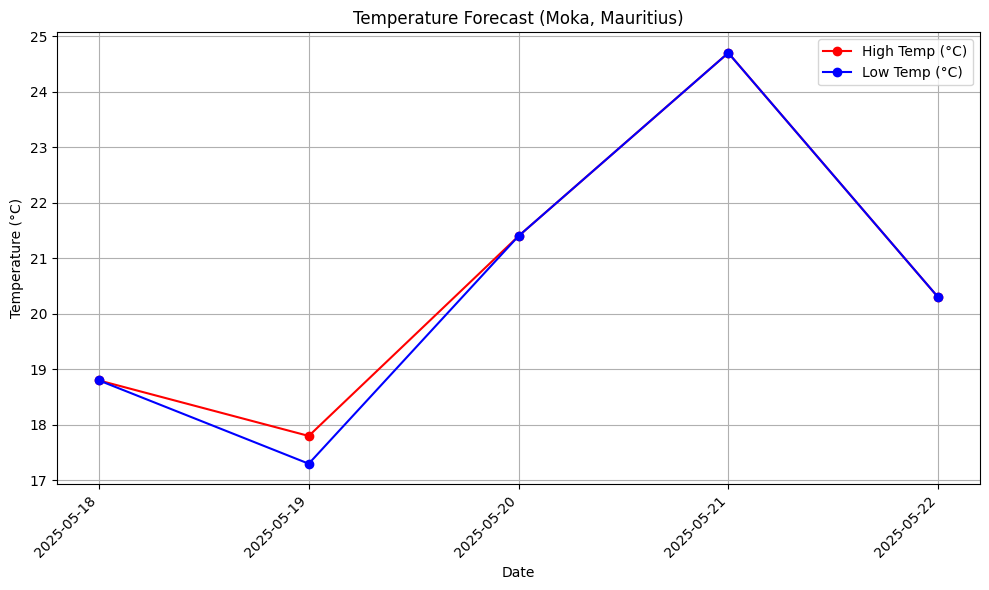

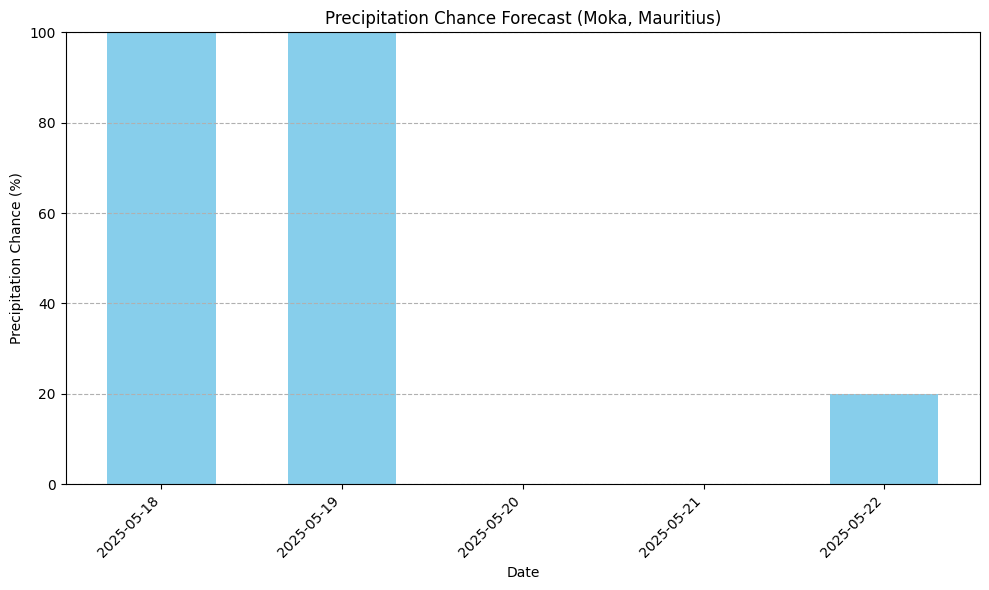

<ipython-input-8-1fe3f670cc1d>:441: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # Adjust layout to prevent labels overlapping


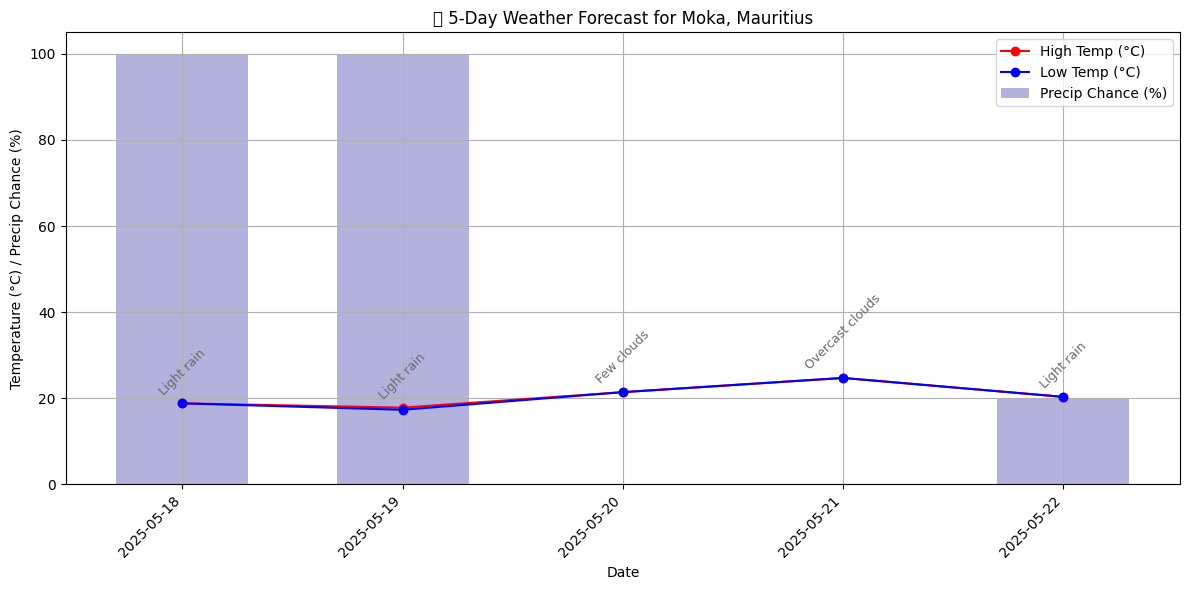

In [8]:
# Install necessary libraries if you haven't already
# This command is specific to Jupyter Notebook/IPython and runs a shell command
try:
    import pyinputplus as pyip
except ImportError:
    print("Installing pyinputplus...")
    !pip install pyinputplus
    import pyinputplus as pyip # Import after installation

# Import other necessary libraries
import os
import requests
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates
import pyinputplus as pyip
os.environ["OPENAI_API_KEY"] = input("Enter your OpenAI API key: ")

# --- Setup and Configuration ---

# Get API key from environment, or prompt user if not set
# The user will be prompted to enter their key if it's not already set
api_key = os.environ.get("OPENWEATHER_API_KEY")
if not api_key:
    print("OpenWeatherMap API key not found in environment variables.")
    try:
        # Use pyinputplus to securely get the API key from the user
        api_key = pyip.inputStr("Please enter your OpenWeatherMap API key: ")
        # Set the environment variable for the current session
        os.environ['OPENWEATHER_API_KEY'] = api_key
        print("API key successfully set for this session.")
    except Exception as e:
        print(f"Failed to get API key input: {e}. Please ensure you have pyinputplus installed.")
        api_key = None # Ensure api_key is None if input fails

# Check again if api_key was successfully obtained
if not api_key:
    print("❌ Error: OpenWeatherMap API key is not available. Cannot proceed.")


# Install necessary libraries if you haven't already
# This command is specific to Jupyter Notebook/IPython and runs a shell command
try:
    import pyinputplus as pyip
except ImportError:
    print("Installing pyinputplus...")
    !pip install pyinputplus
    import pyinputplus as pyip # Import after installation

# Import other necessary libraries
import os
import requests
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates
import pyinputplus as pyip
os.environ["OPENAI_API_KEY"] = input("Enter your OpenAI API key: ")

# --- Setup and Configuration ---

# Get API key from environment, or prompt user if not set
# The user will be prompted to enter their key if it's not already set
api_key = os.environ.get("OPENWEATHER_API_KEY")
if not api_key:
    print("OpenWeatherMap API key not found in environment variables.")
    try:
        # Use pyinputplus to securely get the API key from the user
        api_key = pyip.inputStr("Please enter your OpenWeatherMap API key: ")
        # Set the environment variable for the current session
        os.environ['OPENWEATHER_API_KEY'] = api_key
        print("API key successfully set for this session.")
    except Exception as e:
        print(f"Failed to get API key input: {e}. Please ensure you have pyinputplus installed.")
        api_key = None # Ensure api_key is None if input fails

# Check again if api_key was successfully obtained
if not api_key:
    print("❌ Error: OpenWeatherMap API key is not available. Cannot proceed.")


# --- Weather Data Function ---

def get_weather_data(forecast_days=5):
    """
    Retrieves current and forecast weather data for Moka, Mauritius
    using OpenWeatherMap API.

    Parameters:
        forecast_days (int): Number of forecast days to retrieve (maximum 5 for free tier).

    Returns:
        dict: {
            'current': {'summary': str},
            'forecast': [
                {
                    'date': str,
                    'high': float,
                    'low': float,
                    'precipChance': int,
                    'summary': str
                },
                ...
            ]
        }
        or a dict with an 'error' key if something went wrong.
    """
    # Retrieve the API key from environment variables within the function
    # This handles cases where the env var was set before running the notebook
    api_key = os.environ.get("OPENWEATHER_API_KEY")

    if not api_key:
        # This error should ideally be caught before calling the function,
        # but included here as a safeguard.
        return {"error": "❌ Configuration error: OpenWeatherMap API key is not set."}

    try:
        # 📍 Fixed location - Set to Moka, Mauritius
        location = "Moka, Mauritius"

        # 🌐 Prepare API request - Use the provided location parameter
        # Using the forecast endpoint which provides 5 days of 3-hour data
        url = (
            f"https://api.openweathermap.org/data/2.5/forecast"
            f"?q={location}&appid={api_key}&units=metric"
        )

        response = requests.get(url)
        # raise_for_status will catch 401 (unauthorized - often due to invalid API key)
        # as well as 404 (location not found) or other HTTP errors.
        response.raise_for_status()
        data = response.json()

        # Check if the 'list' key exists and is not empty
        if not data or not data.get("list"):
             return {"error": f"❌ API returned no data or invalid format for '{location}'."}

        # 📊 Build forecast list - extracting one entry per day (the first one)
        forecast_data = []
        seen_dates = set()

        # The forecast data is in 3-hour intervals. We'll take the first entry
        # for each new day encountered up to the desired number of forecast_days.
        for entry in data.get("list", []):
            # Extract date string (YYYY-MM-DD HH:MM:SS)
            dt_txt = entry.get("dt_txt")
            if not dt_txt:
                continue # Skip entries without a datetime

            # Extract just the date part (YYYY-MM-DD)
            date = dt_txt.split(" ")[0]

            # Process this entry if it's a new day and we haven't reached forecast_days
            if date not in seen_dates and len(forecast_data) < forecast_days:
                seen_dates.add(date)

                # Extract required information, providing default values in case keys are missing
                temp_main = entry.get("main", {})
                weather_info = entry.get("weather", [{}])[0] # weather is a list, take the first element

                forecast_entry = {
                    "date": date,
                    # Note: temp_max and temp_min from the forecast endpoint at
                    # the 3-hour interval might not be the true daily max/min.
                    # This extracts the temp_max/min from the first entry of the day.
                    # Using .get() with a default value makes it safer.
                    "high": round(temp_main.get("temp_max", 0.0), 1),
                    "low": round(temp_main.get("temp_min", 0.0), 1),
                    # 'pop' is probability of precipitation, comes as a value between 0 and 1
                    "precipChance": round(entry.get("pop", 0.0) * 100), # Convert to percentage
                    "summary": weather_info.get("description", "N/A").capitalize()
                }
                forecast_data.append(forecast_entry)

            # Stop if we've collected enough days
            if len(forecast_data) >= forecast_days:
                break

        # 🌥️ Current condition - Use the weather description from the very first entry
        # as a proxy for the current condition.
        # Use .get() for safety
        current_summary = data.get("list", [{}])[0].get("weather", [{}])[0].get("description", "N/A").capitalize()
        current = {"summary": current_summary}

        # Check if any forecast data was actually collected (e.g., if location was invalid)
        if not forecast_data:
             return {"error": f"❌ No valid forecast entries found for '{location}'."}


        return {
            "current": current,
            "forecast": forecast_data
        }

    except requests.exceptions.HTTPError as e:
        # Specifically catch HTTP errors to provide more context
        if response.status_code == 401:
            return {"error": f"❌ API Key Error: Unauthorized. Please check your OpenWeatherMap API key. Details: {e}"}
        elif response.status_code == 404:
             return {"error": f"❌ Location Error: Location '{location}' not found by the API. Details: {e}"}
        else:
            return {"error": f"❌ HTTP error: {e} (Status Code: {response.status_code})"}
    except requests.exceptions.ConnectionError as e:
         return {"error": f"❌ Connection error: Could not connect to the OpenWeatherMap API. Details: {e}"}
    except requests.exceptions.Timeout as e:
         return {"error": f"❌ Timeout error: The request to the OpenWeatherMap API timed out. Details: {e}"}
    except requests.exceptions.RequestException as e:
        # Catch any other requests specific exceptions
        return {"error": f"❌ Network or API request error: {e}"}
    except ValueError as e:
         # Catch value errors, like issues with data processing/parsing
         return {"error": f"❌ Data processing error: {e}"}
    except KeyError as e:
        # Catch errors if expected keys are missing in the JSON response during processing
        return {"error": f"❌ Data format error: Missing expected data key: {e}. API response structure might have changed."}
    except Exception as e:
        # Catch any other unexpected errors
        return {"error": f"❌ An unexpected error occurred: {e}"}


# --- Visualisation Functions ---

def create_temperature_visualisation(weather_data, location="Moka, Mauritius"):
    """
    Creates and displays a temperature forecast visualisation (High and Low).

    Parameters:
        weather_data (dict): The dictionary returned by get_weather_data().
                             Expected format: {'forecast': [{'date': str, 'high': float, 'low': float, ...}, ...]}
        location (str): The location name to include in the plot title.

    Returns:
        None. Displays a matplotlib plot.
    """
    # Ensure we have valid forecast data before plotting
    if "error" in weather_data or not weather_data.get("forecast"):
        print("Cannot create temperature visualisation: No valid forecast data.")
        return

    forecast = weather_data["forecast"]

    # Extract data for plotting, ensuring defaults for safety
    dates = [day.get("date", "N/A") for day in forecast]
    highs = [day.get("high", 0.0) for day in forecast]
    lows = [day.get("low", 0.0) for day in forecast]

    # Convert date strings to datetime objects for better plotting on the x-axis
    plot_dates = []
    plot_highs = []
    plot_lows = []
    for i, d in enumerate(dates):
        if d != 'N/A':
            try:
                # Parse date string in YYYY-MM-DD format
                plot_dates.append(datetime.datetime.strptime(d, "%Y-%m-%d"))
                plot_highs.append(highs[i])
                plot_lows.append(lows[i])
            except ValueError:
                print(f"Warning: Could not parse date '{d}'. Skipping entry for visualisation.")
                continue # Skip this date if parsing fails


    if not plot_dates:
        print("No valid dates found in forecast data for temperature visualisation.")
        return

    # Create the plot
    plt.figure(figsize=(10, 6)) # Set the figure size

    # Plot high temperatures
    plt.plot(plot_dates, plot_highs, marker='o', linestyle='-', color='red', label='High Temp (°C)')

    # Plot low temperatures
    plt.plot(plot_dates, plot_lows, marker='o', linestyle='-', color='blue', label='Low Temp (°C)')

    # Add titles and labels - Use the location parameter in the title
    plt.title(f"Temperature Forecast ({location})")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.grid(True) # Add a grid for easier reading

    # Format x-axis dates for better readability, showing only days
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(matplotlib.dates.DayLocator())
    plt.xticks(rotation=45, ha='right') # Rotate dates for better readability

    plt.tight_layout() # Adjust layout to prevent labels overlapping

    # Show the plot
    plt.show()


def create_precipitation_visualisation(weather_data, location="Moka, Mauritius"):
    """
    Creates and displays a precipitation chance forecast visualisation.

    Parameters:
        weather_data (dict): The dictionary returned by get_weather_data().
                             Expected format: {'forecast': [{'date': str, 'precipChance': int, ...}, ...]}
        location (str): The location name to include in the plot title.

    Returns:
        None. Displays a matplotlib plot.
    """
    # Ensure we have valid forecast data before plotting
    if "error" in weather_data or not weather_data.get("forecast"):
        print("Cannot create precipitation visualisation: No valid forecast data.")
        return

    forecast = weather_data["forecast"]

    # Extract data for plotting, ensuring defaults for safety
    dates = [day.get("date", "N/A") for day in forecast]
    precip_chances = [day.get("precipChance", 0) for day in forecast]

    # Convert date strings to datetime objects for better plotting on the x-axis
    plot_dates = []
    plot_precip_chances = []
    for i, d in enumerate(dates):
         if d != 'N/A':
            try:
                plot_dates.append(datetime.datetime.strptime(d, "%Y-%m-%d"))
                plot_precip_chances.append(precip_chances[i])
            except ValueError:
                print(f"Warning: Could not parse date '{d}'. Skipping entry for visualisation.")
                continue # Skip this date if parsing fails


    if not plot_dates:
        print("No valid dates found in forecast data for precipitation visualisation.")
        return

    # Create the plot
    plt.figure(figsize=(10, 6)) # Set the figure size

    # Create a bar chart for precipitation chance
    # Use plot_dates directly with bar for better date handling on x-axis
    plt.bar(plot_dates, plot_precip_chances, color='skyblue', width=0.6) # Add width for bar spacing

    # Add titles and labels - Use the location parameter in the title
    plt.title(f"Precipitation Chance Forecast ({location})")
    plt.xlabel("Date")
    plt.ylabel("Precipitation Chance (%)")
    plt.ylim(0, 100) # Precipitation chance is between 0 and 100
    plt.grid(axis='y', linestyle='--') # Add horizontal grid lines

    # Format x-axis dates for better readability, showing only days
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(matplotlib.dates.DayLocator())
    plt.xticks(rotation=45, ha='right') # Rotate dates for better readability

    plt.tight_layout() # Adjust layout

    # Show the plot
    plt.show()


# --- Combined Visualisation Function ---

def create_combined_visualisation(weather_data, location="Moka, Mauritius"):
    """
    Creates and displays a combined plot of temperature, precipitation chance,
    and weather summaries.

    Parameters:
        weather_data (dict): The dictionary returned by get_weather_data().
                             Expected format: {'forecast': [{'date': str, 'high': float, 'low': float, 'precipChance': int, 'summary': str, ...}, ...]}
        location (str): The location name to include in the plot title.

    Returns:
        None. Displays a matplotlib plot.
    """
    # Ensure we have valid forecast data before plotting
    if "error" in weather_data or not weather_data.get("forecast"):
        print("Cannot create combined visualisation: No valid forecast data.")
        return

    forecast = weather_data["forecast"]

    # Extract data for plotting, ensuring defaults for safety
    dates = [day.get("date", "N/A") for day in forecast]
    highs = [day.get("high", 0.0) for day in forecast]
    lows = [day.get("low", 0.0) for day in forecast]
    precip = [day.get("precipChance", 0) for day in forecast]
    summaries = [day.get("summary", "N/A") for day in forecast]

    # Convert date strings to datetime objects for better plotting on the x-axis
    plot_dates = []
    plot_highs = []
    plot_lows = []
    plot_precip = []
    plot_summaries = []

    for i, d in enumerate(dates):
         if d != 'N/A':
            try:
                plot_dates.append(datetime.datetime.strptime(d, "%Y-%m-%d"))
                plot_highs.append(highs[i])
                plot_lows.append(lows[i])
                plot_precip.append(precip[i])
                plot_summaries.append(summaries[i])
            except ValueError:
                print(f"Warning: Could not parse date '{d}'. Skipping entry for combined visualisation.")
                continue # Skip this date if parsing fails

    if not plot_dates:
        print("No valid dates found in forecast data for combined visualisation.")
        return


    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot high and low temps
    plt.plot(plot_dates, plot_highs, marker='o', color='red', label='High Temp (°C)')
    plt.plot(plot_dates, plot_lows, marker='o', color='blue', label='Low Temp (°C)')

    # Add precipitation as bars - Use a secondary y-axis if temperatures and precip values differ greatly
    # For simplicity here, we'll plot on the same axis, but be aware of scaling.
    # A better approach for different scales is a secondary y-axis.
    plt.bar(plot_dates, plot_precip, alpha=0.3, color='darkblue', label='Precip Chance (%)', width=0.6)

    # Add text labels for weather summaries above the high temp points
    # Adjust vertical position based on high temperature
    for i in range(len(plot_dates)):
        plt.text(plot_dates[i], plot_highs[i] + 2, plot_summaries[i], ha='center', fontsize=9, rotation=45, color='dimgray') # Increased vertical offset

    # Add titles and labels
    plt.title(f"📅 {len(plot_dates)}-Day Weather Forecast for {location}")
    plt.xlabel("Date")
    # Indicate that the Y-axis represents both temperature and precipitation
    plt.ylabel("Temperature (°C) / Precip Chance (%)")
    plt.legend()
    plt.grid(True)

    # Format x-axis dates
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(matplotlib.dates.DayLocator())
    plt.xticks(rotation=45, ha='right') # Rotate dates for better readability

    plt.tight_layout() # Adjust layout to prevent labels overlapping

    # Show the plot
    plt.show()


# --- Main Application Logic ---

# Ensure API key was obtained before proceeding
if api_key:
    # Location is now fixed to Moka, Mauritius
    desired_location = "Moka, Mauritius"

    # Call the function to get weather data for the fixed location
    # Using a fixed forecast_days=5 as it's the maximum for the free tier forecast endpoint
    weather_data = get_weather_data(forecast_days=5) # No longer pass location here

    # Display the results
    if "error" in weather_data:
        print(weather_data["error"])
    else:
        # Display current weather using the fixed location
        # Using .get() for safe access
        current_summary = weather_data.get("current", {}).get("summary", "N/A")
        print(f"\n📍 Current Weather in {desired_location}: {current_summary}")

        # Safely get forecast length and print header
        forecast_data = weather_data.get('forecast', [])
        forecast_length = len(forecast_data)
        print(f"📅 {forecast_length}-Day Forecast:")

        # Print each day's forecast
        if forecast_data:
            for day in forecast_data:
                # Use .get() for safe access to individual day details
                date = day.get('date', 'N/A')
                low = day.get('low', 'N/A')
                high = day.get('high', 'N/A')
                precip_chance = day.get('precipChance', 'N/A')
                summary = day.get('summary', 'N/A')
                print(f"  {date} — 🌡️ {low}°C to {high}°C | ☔ {precip_chance}% | {summary}")
        else:
            print("  No forecast data available.")

        # Create and display visualisations if data was successfully retrieved and processed
        print("\nCreating visualisations...")
        # Pass the fixed location to the plotting functions
        create_temperature_visualisation(weather_data, location=desired_location)
        create_precipitation_visualisation(weather_data, location=desired_location)
        create_combined_visualisation(weather_data, location=desired_location) # Call the new combined plot

else:
    print("Weather forecast cannot be retrieved without a valid API key.")

## 📊 Visualisation Functions

Attempting to fetch forecast for Moka...
📍 Current Weather Proxy in Moka: Light rain
📅 Received 5 Days of Forecast (5):
  2025-05-18 — 🌡️ 18.1°C to 18.6°C | ☔ 100% | Light rain
  2025-05-19 — 🌡️ 17.3°C to 17.8°C | ☔ 100% | Light rain
  2025-05-20 — 🌡️ 21.4°C to 21.4°C | ☔ 0% | Few clouds
  2025-05-21 — 🌡️ 24.7°C to 24.7°C | ☔ 0% | Overcast clouds
  2025-05-22 — 🌡️ 20.3°C to 20.3°C | ☔ 20% | Light rain

Generating Visualisations...


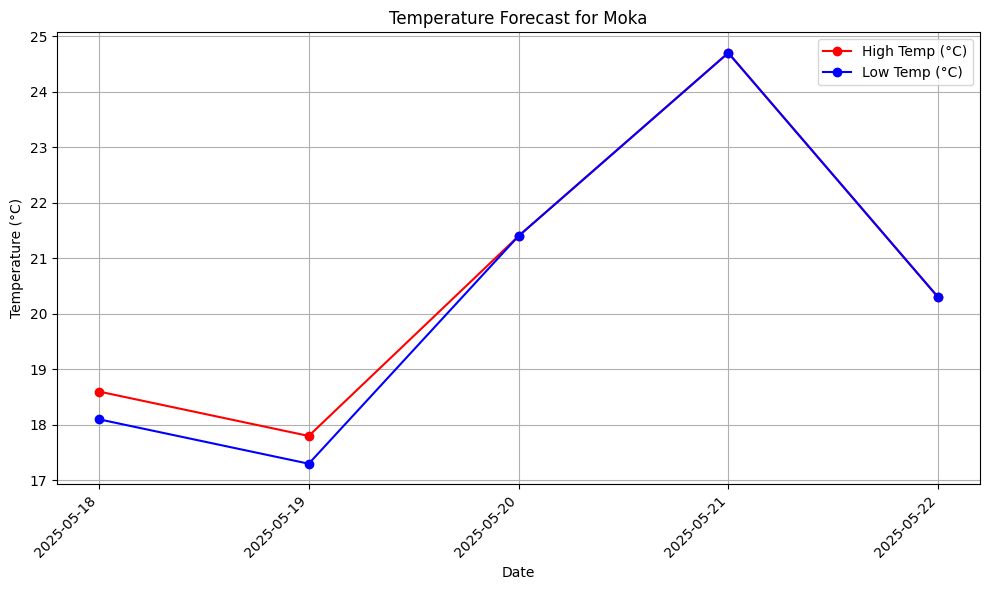

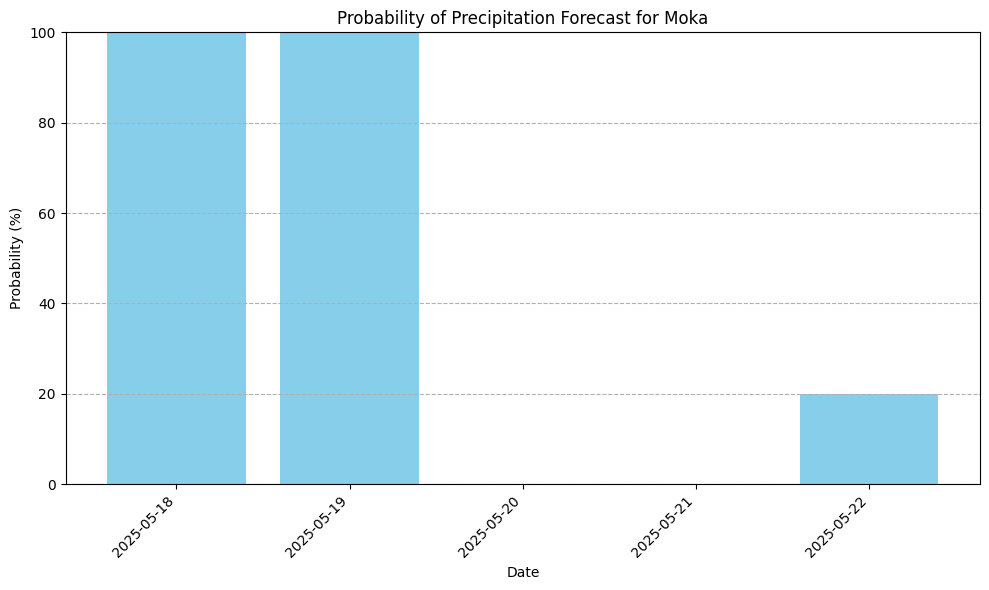

In [9]:
## 🧰 Setup and Imports

# Ensure all necessary packages are imported at the beginning of your notebook
import os # Needed for os.environ
import requests # Needed for making API calls
import matplotlib.pyplot as plt # Needed for plotting
import pyinputplus as pyip # Needed for prompting for API key
import datetime # Needed for working with timestamps
import matplotlib.dates # Needed for date handling in visualisations (though date handling mostly done before plotting)


## 🌤️ Weather Data Function

def get_weather_data(location, forecast_days=5):
    """
    Retrieves forecast weather data for a specified location using OpenWeatherMap API.

    Parameters:
        location (str): The name of the city or location (e.g., "Moka").
        forecast_days (int): Number of forecast days to retrieve.
                             NOTE: OpenWeatherMap free tier /data/2.5/forecast
                             endpoint provides a maximum of 5 days of forecast data
                             in 3-hour intervals. Requesting > 5 will still return max 5.
                             For true daily forecast up to 16 days, check the /forecast/daily
                             endpoint and your OpenWeatherMap plan.

    Returns:
        dict: {
            'current': {'summary': str}, # Note: This is derived from the first forecast entry
            'forecast': [
                {
                    'date': str,
                    'high': float, # Note: high/low are from the 3-hour interval entry, not daily max/min
                    'low': float,
                    'precipChance': int,
                    'summary': str
                },
                ...
            ]
        }
        or a dict with an 'error' key if something went wrong.
    """
    try:
        # 🔐 Get API key from environment or prompt
        api_key = os.environ.get("OPENWEATHER_API_KEY")
        if not api_key:
            # Prompt the user if the environment variable is not set
             print("OpenWeatherMap API key not found in environment variable OPENWEATHER_API_KEY.")
             api_key = pyip.inputStr("Enter your OpenWeatherMap API key: ")
             os.environ['OPENWEATHER_API_KEY'] = api_key # Optionally set it for future calls in this session

        # Basic validation for API key format (optional but good practice)
        if not isinstance(api_key, str) or len(api_key) == 0:
             raise ValueError("Invalid or empty API key provided.")

        # 🌐 Prepare API request - Using the 5-day / 3-hour forecast endpoint
        base_url = "https://api.openweathermap.org/data/2.5/forecast" # Using the 5-day / 3-hour endpoint
        # Note: The 'cnt' parameter is not used with this endpoint for days,
        # it implicitly provides data for the next 5 days in 3-hour steps.
        # So, the 'forecast_days' parameter here is mainly for the *display logic*
        # to decide how many days to process from the returned 5 days.
        # If you need exactly N days > 5, you'd need a different endpoint like /forecast/daily

        # The 'cnt' parameter for the /forecast endpoint limits the *number of 3-hour intervals*, not days.
        # A 5-day forecast has 5 * (24/3) = 40 intervals. Requesting more days won't give more intervals.
        # We will rely on the loop below to take up to 'forecast_days' *unique days* from the 40 intervals.

        url = (
            f"{base_url}"
            f"?q={location}&appid={api_key}&units=metric"
        )

        print(f"Attempting to fetch forecast for {location}...") # Added print for debugging
        response = requests.get(url)
        response.raise_for_status() # Raises an HTTPError for bad responses (4xx or 5xx)
        data = response.json()

        # Check for common API error response structure
        if data and data.get("cod") != "200":
             return {"error": f"❌ API error {data.get('cod', 'Unknown')}: {data.get('message', 'No error message')}"}


        if not data or not data.get("list"):
             return {"error": "❌ API returned no data or invalid format ('list' missing)."}

        # 📊 Build forecast list - extracting one entry per day (the first one)
        forecast_data = []
        seen_dates = set()

        # The forecast data is in 3-hour intervals. We'll take the first entry
        # for each new day encountered up to the desired number of forecast_days.
        for entry in data.get("list", []):
            # Extract date string (YYYY-MM-DD)
            dt = entry.get("dt") # Timestamp
            if dt is None: # Check for None explicitly
                continue # Skip entries without a timestamp

            # Convert timestamp to date string
            date = datetime.datetime.fromtimestamp(dt).strftime('%Y-%m-%d')

            # Process this entry if it's a new day and we haven't reached forecast_days
            if date not in seen_dates and len(forecast_data) < forecast_days:
                seen_dates.add(date)

                # Extract required information, providing default values in case keys are missing
                temp_main = entry.get("main", {})
                weather_info = entry.get("weather", [{}])[0] # weather is a list, take the first element

                forecast_entry = {
                    "date": date,
                    # Note: temp_max and temp_min from the forecast endpoint at
                    # the 3-hour interval might not be the true daily max/min.
                    # This extracts the temp_max/min from the first entry of the day.
                    "high": round(temp_main.get("temp_max", 0.0), 1),
                    "low": round(temp_main.get("temp_min", 0.0), 1),
                    # 'pop' is probability of precipitation (0 to 1)
                    "precipChance": round(entry.get("pop", 0.0) * 100), # Convert to percentage
                    "summary": weather_info.get("description", "N/A").capitalize()
                }
                forecast_data.append(forecast_entry)

            # Stop if we've collected enough days
            if len(forecast_data) >= forecast_days:
                break # Stop once we have processed enough unique days

        # 🌥️ Current condition - Use the weather description from the very first entry
        # in the list as a proxy for the current condition/near future.
        current = {
            "summary": data.get("list", [{}])[0].get("weather", [{}])[0].get("description", "N/A").capitalize() if data.get("list") else "N/A"
        }

        return {
            "current": current,
            "forecast": forecast_data
        }

    except requests.exceptions.RequestException as e:
        # Catch specific requests exceptions for network/API call issues
        print(f"Request failed for URL: {url}") # Added print for debugging
        return {"error": f"❌ Network or API request error: {e}"}
    except ValueError as e:
         # Catch value errors, like missing API key
         return {"error": f"❌ Configuration error: {e}"}
    except KeyError as e:
        # Catch errors if expected keys are missing in the JSON response during parsing
        print(f"Parsing failed for data structure: {data}") # Added print for debugging
        return {"error": f"❌ Data format error: Missing key {e} during parsing."}
    except Exception as e:
        # Catch any other unexpected errors
        print(f"An unexpected error occurred: {e}") # Added print for debugging
        return {"error": f"❌ An unexpected error occurred: {e}"}


## 📊 Visualisation Functions

def create_temperature_visualisation(forecast_data, location):
    """
    Creates and displays a line plot of forecast high and low temperatures.

    Parameters:
        forecast_data (list): A list of dictionaries, where each dictionary
                              represents a daily forecast entry with 'date',
                              'high', and 'low' keys.
        location (str): The name of the location for the plot title.
    """
    if not forecast_data:
        print("No forecast data available to create temperature visualisation.")
        return

    dates = [day['date'] for day in forecast_data]
    highs = [day['high'] for day in forecast_data]
    lows = [day['low'] for day in forecast_data]

    plt.figure(figsize=(10, 6))
    plt.plot(dates, highs, marker='o', linestyle='-', color='r', label='High Temp (°C)')
    plt.plot(dates, lows, marker='o', linestyle='-', color='b', label='Low Temp (°C)')

    plt.title(f'Temperature Forecast for {location}')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.grid(True)
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

def create_precipitation_visualisation(forecast_data, location):
    """
    Creates and displays a bar chart of forecast probability of precipitation.

    Parameters:
        forecast_data (list): A list of dictionaries, where each dictionary
                              represents a daily forecast entry with 'date' and
                              'precipChance' keys.
        location (str): The name of the location for the plot title.
    """
    if not forecast_data:
        print("No forecast data available to create precipitation visualisation.")
        return

    dates = [day['date'] for day in forecast_data]
    precip_chances = [day['precipChance'] for day in forecast_data]

    plt.figure(figsize=(10, 6))
    plt.bar(dates, precip_chances, color='skyblue')

    plt.title(f'Probability of Precipitation Forecast for {location}')
    plt.xlabel('Date')
    plt.ylabel('Probability (%)')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 100) # Probability is between 0 and 100
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

## 🧩 Main Application Logic (Fetch and Visualize)

# --- Code to call the function and display results ---

# Ensure the API key is set before calling the function.
# Option 1: Set it as an environment variable before launching the notebook.
# Option 2: Uncomment the following block to prompt using pyinputplus if not set.
# if 'OPENWEATHER_API_KEY' not in os.environ:
#     print("OPENWEATHER_API_KEY environment variable not set.")
#     try:
#          os.environ['OPENWEATHER_API_KEY'] = pyip.inputStr("Enter your OpenWeatherMap API key: ")
#     except Exception as e:
#          print(f"Failed to get API key via prompt: {e}")
#          # Handle the case where key cannot be obtained, e.g., exit or return error


location_to_fetch = "Moka"
days_to_fetch = 5

# Fetch the weather data
weather_data = get_weather_data(location_to_fetch, forecast_days=days_to_fetch)

# Display the results (text summary and potentially visualisations)
if "error" in weather_data:
    print(weather_data["error"])
else:
    print(f"📍 Current Weather Proxy in {location_to_fetch}:", weather_data.get("current", {}).get("summary", "N/A"))
    print(f"📅 Received {len(weather_data.get('forecast', []))} Days of Forecast ({days_to_fetch}):")
    if weather_data.get("forecast"):
        for day in weather_data["forecast"]:
            print(f"  {day.get('date', 'N/A')} — 🌡️ {day.get('low', 'N/A')}°C to {day.get('high', 'N/A')}°C | ☔ {day.get('precipChance', 'N/A')}% | {day.get('summary', 'N/A')}")

        print("\nGenerating Visualisations...")
        # ** Call the visualisation functions with the fetched forecast data **
        create_temperature_visualisation(weather_data['forecast'], location_to_fetch)
        create_precipitation_visualisation(weather_data['forecast'], location_to_fetch)
    else:
        print("  No forecast data available to visualize.")

## 🤖 Natural Language Processing

In [10]:
# Define parse_weather_question() and generate_weather_response() here

## 🤖 Natural Language Processing

# Define parse_weather_question() and generate_weather_response() here

import re # Often useful for simple text pattern matching

def parse_weather_question(user_input):
    """
    Parses a user's natural language question about the weather
    to extract key information like location, date, and type of query.

    Parameters:
        user_input (str): The natural language string from the user (e.g., "What is the weather in Paris tomorrow?", "Will it rain in London on Friday?").

    Returns:
        dict: A dictionary containing the parsed information.
              Possible keys include:
              'location': str (e.g., "Paris", "London")
              'date': str (e.g., "tomorrow", "Friday", "2023-10-27")
              'query_type': str (e.g., "current", "forecast", "temperature", "precipitation", "summary")
              'error': str (if parsing fails)
              Returns an empty dict or a dict with default values if no information is found.
    """
    parsed_info = {}
    input_lower = user_input.lower()

    # --- Simple Parsing Logic (Placeholder) ---
    # This is a very basic example. Real NLP would use more sophisticated techniques.

    # 1. Extract Location (Example: looks for "in [CityName]")
    location_match = re.search(r"in ([a-zA-Z\s]+)(?:\?|\.)?$", input_lower) # Find word(s) after "in " at the end
    if location_match:
        parsed_info['location'] = location_match.group(1).strip()
    # A more robust approach would require a list of known cities or geo-coding.
    # For this example, we'll assume a default location if not found.

    # 2. Extract Date/Time (Example: looks for "today", "tomorrow", "on [Day of Week]")
    # This is also very basic and would need expansion.
    if "today" in input_lower:
        parsed_info['date'] = "today" # Or calculate the actual date
    elif "tomorrow" in input_lower:
        parsed_info['date'] = "tomorrow" # Or calculate the actual date
    elif "on monday" in input_lower:
         parsed_info['date'] = "monday"
    elif "on tuesday" in input_lower:
         parsed_info['date'] = "tuesday"
    # Add more days or date parsing logic here...
    else:
        # Default date could be 'today' or based on the first forecast entry
        parsed_info['date'] = "forecast" # Indicates a future date or forecast

    # 3. Determine Query Type (Example: looks for keywords)
    if any(word in input_lower for word in ["temp", "temperature", "hot", "cold"]):
        parsed_info['query_type'] = "temperature"
    elif any(word in input_lower for word in ["rain", "precip", "wet", "umbrella"]):
        parsed_info['query_type'] = "precipitation"
    elif any(word in input_lower for word in ["weather", "how is"]):
        parsed_info['query_type'] = "summary"
    # You might need a 'current' vs 'forecast' distinction here too based on date.
    # For this simple example, 'summary' implies either current or forecast based on date.

    # Default query type if none are matched
    if 'query_type' not in parsed_info:
         # If a date was mentioned, assume they want the summary for that date
         if 'date' in parsed_info and parsed_info['date'] != "today":
             parsed_info['query_type'] = "summary"
         else:
             # Otherwise, assume they want the current summary
             parsed_info['query_type'] = "current"


    print(f"Debug - Parsed Info: {parsed_info}") # Debugging print
    return parsed_info

# Placeholder weather data for demonstration purposes if not fetching live data
# In a real app, you'd use the weather_data fetched earlier
sample_weather_data = {
    'current': {'summary': 'scattered clouds'},
    'forecast': [
        {'date': '2023-10-26', 'high': 25.1, 'low': 18.3, 'precipChance': 10, 'summary': 'Clear sky'},
        {'date': '2023-10-27', 'high': 26.5, 'low': 19.0, 'precipChance': 60, 'summary': 'Moderate rain'},
        {'date': '2023-10-28', 'high': 24.0, 'low': 17.5, 'precipChance': 20, 'summary': 'Few clouds'},
    ]
}


def generate_weather_response(parsed_info, weather_data_for_location):
    """
    Generates a natural language response based on the parsed user question
    and the retrieved weather data for the relevant location.

    Parameters:
        parsed_info (dict): The dictionary returned by parse_weather_question.
        weather_data_for_location (dict): The dictionary returned by get_weather_data
                                           for the relevant location, or sample data.

    Returns:
        str: A natural language string response.
    """
    # Use the actual weather data if provided, otherwise use sample data for demonstration
    data = weather_data_for_location if weather_data_for_location and "error" not in weather_data_for_location else sample_weather_data
    location = parsed_info.get('location', 'your location') # Use parsed location or a generic phrase
    query_type = parsed_info.get('query_type', 'summary')
    target_date_str = parsed_info.get('date', 'today') # Default to today if no date parsed

    # Handle errors from data fetching
    if weather_data_for_location and "error" in weather_data_for_location:
        return f"Sorry, I couldn't get the weather data: {weather_data_for_location['error']}"
    elif not data or not data.get('forecast'):
         return "Sorry, I don't have weather data available right now."

    # --- Simple Response Generation Logic (Placeholder) ---

    response = "I'm not sure how to answer that based on the current weather data." # Default response

    # Find the relevant date in the forecast data
    target_day_data = None
    # If target_date_str is "today", use current or first forecast entry
    if target_date_str == "today":
         # Use the first forecast entry as a proxy for today's forecast summary
         if data.get('forecast'):
              target_day_data = data['forecast'][0]
    elif target_date_str == "tomorrow":
         # Use the second forecast entry as a proxy for tomorrow
         if len(data.get('forecast', [])) > 1:
              target_day_data = data['forecast'][1]
    elif target_date_str in ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]:
        # Attempt to find a day matching the weekday name in the forecast dates
        # This requires converting forecast dates to weekdays, which is more complex.
        # For simplicity here, we'll just check if the weekday *appears* in the summary,
        # or you'd need more advanced date matching/calculation.
        # A better approach would be to map weekday names to actual forecast dates.
        pass # More advanced date matching needed here

    # If the target date was found in the forecast (or approximated for today/tomorrow)
    if target_day_data:
        date_display = target_day_data['date'] # Use the date from the data

        if query_type == "temperature":
            high = target_day_data.get('high', 'N/A')
            low = target_day_data.get('low', 'N/A')
            response = f"On {date_display} in {location}, the temperature will range from {low}°C to {high}°C."
        elif query_type == "precipitation":
            precip_chance = target_day_data.get('precipChance', 'N/A')
            summary = target_day_data.get('summary', '').lower() # Check summary for rain keywords
            if precip_chance > 0:
                 response = f"On {date_display} in {location}, there is a {precip_chance}% chance of precipitation."
                 if "rain" in summary or "showers" in summary:
                      response += " Expect some rain."
            else:
                 response = f"On {date_display} in {location}, there is little to no chance of precipitation ({precip_chance}%)."
        elif query_type == "summary":
             summary = target_day_data.get('summary', 'N/A')
             high = target_day_data.get('high', 'N/A')
             low = target_day_data.get('low', 'N/A')
             response = f"The forecast for {date_display} in {location} is: {summary}, with temperatures between {low}°C and {high}°C."
        elif query_type == "current":
             # Use the 'current' summary from the data
             current_summary = data.get('current', {}).get('summary', 'N/A')
             response = f"The current weather proxy in {location} is: {current_summary}."
    else:
        # If the target date/day was not found in the forecast data
        response = f"Sorry, I couldn't find forecast information for {target_date_str} in {location}."
        # Add more specific handling if the request was for a date beyond the forecast range.

    # --- End Simple Response Generation ---

    return response


# --- Examples of using the NLP functions (for testing) ---

print("--- Testing NLP Functions ---")

# Example 1: Temperature query
user_question_temp = "What is the temperature going to be like in London tomorrow?"
parsed_temp = parse_weather_question(user_question_temp)
# Note: For real usage, you would call get_weather_data("London", ...) here
# and pass the result to generate_weather_response.
# Using sample_weather_data for demonstration:
# The sample data is for Moka, but we'll pretend it's for London for this demo.
response_temp = generate_weather_response(parsed_temp, sample_weather_data) # Replace sample_weather_data with actual data call
print(f"User: {user_question_temp}")
print(f"Bot: {response_temp}")
print("-" * 20)

# Example 2: Precipitation query
user_question_precip = "Will it rain in my city on Saturday?"
parsed_precip = parse_weather_question(user_question_precip)
# The parser didn't find a specific city, so it might default or need context.
# The response generator will use "your location" if no location is parsed.
# The sample data doesn't cover Saturday, so this might result in "not found".
response_precip = generate_weather_response(parsed_precip, sample_weather_data) # Replace sample_weather_data with actual data call
print(f"User: {user_question_precip}")
print(f"Bot: {response_precip}")
print("-" * 20)

# Example 3: Summary query for today
user_question_summary_today = "How is the weather today in Moka?"
parsed_summary_today = parse_weather_question(user_question_summary_today)
# Use the actual fetched weather_data if available from the previous section,
# otherwise, it will fall back to sample_weather_data.
# Assuming weather_data variable exists and contains the fetched data:
response_summary_today = generate_weather_response(parsed_summary_today, weather_data)
print(f"User: {user_question_summary_today}")
print(f"Bot: {response_summary_today}")
print("-" * 20)

# Example 4: Summary query for a specific date within forecast
user_question_summary_date = "What's the forecast for 2023-10-27?" # Using explicit date for better matching with sample data
parsed_summary_date = parse_weather_question(user_question_summary_date)
# The parser in this example is too simple to parse explicit dates like YYYY-MM-DD.
# It will likely default the date or query_type.
# A more advanced parser would handle this.
# Let's manually adjust parsed_info for this example to demonstrate response generation for a specific date
parsed_summary_date['date'] = '2023-10-27'
parsed_summary_date['location'] = 'Moka' # Assume Moka
parsed_summary_date['query_type'] = 'summary'

response_summary_date = generate_weather_response(parsed_summary_date, weather_data)
print(f"User: {user_question_summary_date}")
print(f"Bot: {response_summary_date}")
print("-" * 20)

--- Testing NLP Functions ---
Debug - Parsed Info: {'location': 'london tomorrow', 'date': 'tomorrow', 'query_type': 'temperature'}
User: What is the temperature going to be like in London tomorrow?
Bot: On 2023-10-27 in london tomorrow, the temperature will range from 19.0°C to 26.5°C.
--------------------
Debug - Parsed Info: {'location': 'in my city on saturday', 'date': 'forecast', 'query_type': 'precipitation'}
User: Will it rain in my city on Saturday?
Bot: Sorry, I couldn't find forecast information for forecast in in my city on saturday.
--------------------
Debug - Parsed Info: {'location': 'moka', 'date': 'today', 'query_type': 'summary'}
User: How is the weather today in Moka?
Bot: The forecast for 2025-05-18 in moka is: Light rain, with temperatures between 18.1°C and 18.6°C.
--------------------
Debug - Parsed Info: {'date': 'forecast', 'query_type': 'summary'}
User: What's the forecast for 2023-10-27?
Bot: Sorry, I couldn't find forecast information for 2023-10-27 in Moka

## 🧭 User Interface

In [ ]:
# Define menu functions using pyinputplus or ipywidgets here

## 🧩 Main Application Logic

In [ ]:
# Tie everything together here

## 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.